In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib import rc
import sympy as sp
from sympy.abc import p, m, M
from sympy import Matrix
from numpy import linalg as LA

rc('font',**{'family':'serif','serif':['Times']})

colors = {
    "p53": "#008DD5",
    "nutlin": "#DB5461",
    "nfkb": "#C33149",
    "tnf": "#107E7D",
    "gray": "#DAE0DC",
    "Mf": "#00A878",
    "mdm2_rna": "#FFA552",
    "eigenvalue1": "#2E294E",
    "eigenvalue2": "#ECC30B",
    "phasespace": "#655995",
    "phasespace2": "#F1AC20"
}

In [3]:
vi = 0.01

Vol = vi*10**(-14); NA = 6.02*10**(23); Cal = NA*Vol*10**(-6)

TC = 0.158

kc1 = 0.15*Cal*TC
# production of p53 [molecules/min]

kc2 = np.array([0.0055, 0.0075, 0.0079])
# degradation of p53 by mdm2 [1/min]

kc3 = 0.1*Cal
# degradation of p53 by mdm2 [molecules]

kc4 = 0.1/Cal*TC
# production of mdm2 - mRNA [1/(molecules*min)]

kc5 = 0.1*TC 
# degradation of mdm2 - mRNA [1/min]

kc6 = 0.2*TC 
# production of mdm2 [1/min]

kc7 = 0.1*TC 
# degradation of mdm2 [1/min]

kc8 = 0.0036 
# binding of mdm2 and nutlin [1/(molecules*min)]

In [4]:
t_samlet = (0, 100000)

p0, m0, Mf0 = 20, 5, 0.5

y0 = [p0, m0, Mf0, kc2[0]]
y1 = [p0, m0, Mf0, kc2[1]]
y2 = [p0, m0, Mf0, kc2[2]]

In [5]:
def p_change(t, p, m, Mf, k2):
    dpdt = kc1 - k2*Mf*(p / (kc3 + p))
    return dpdt

def m_change(t, p, m, Mf, k2):
    dmdt = (kc4 * p**2 - kc5 * m)
    return dmdt

def M_free_change(t, p, m, Mf, k2):
    dM_freedt = kc6 * m - kc7 * Mf
    return dM_freedt

def samlet_system(t, y):
    dydt = np.zeros_like(y)
    dydt[0] = p_change(t, *y)
    dydt[1] = m_change(t, *y)
    dydt[2] = M_free_change(t, *y)
    return dydt

In [6]:
sim1 = solve_ivp(samlet_system, t_samlet, y0, method='LSODA', max_step=1, dense_output=True)
sim2 = solve_ivp(samlet_system, t_samlet, y1, method='LSODA', max_step=1, dense_output=True)
sim3 = solve_ivp(samlet_system, t_samlet, y2, method='LSODA', max_step=1, dense_output=True)

In [7]:
t1 = sim1["t"]
p1 = sim1["y"][0]
m1 = sim1["y"][1]
M1 = sim1["y"][2]

t2 = sim2["t"]
p2 = sim2["y"][0]
m2 = sim2["y"][1]
M2 = sim2["y"][2]

t3 = sim3["t"]
p3 = sim3["y"][0]
m3 = sim3["y"][1]
M3 = sim3["y"][2]

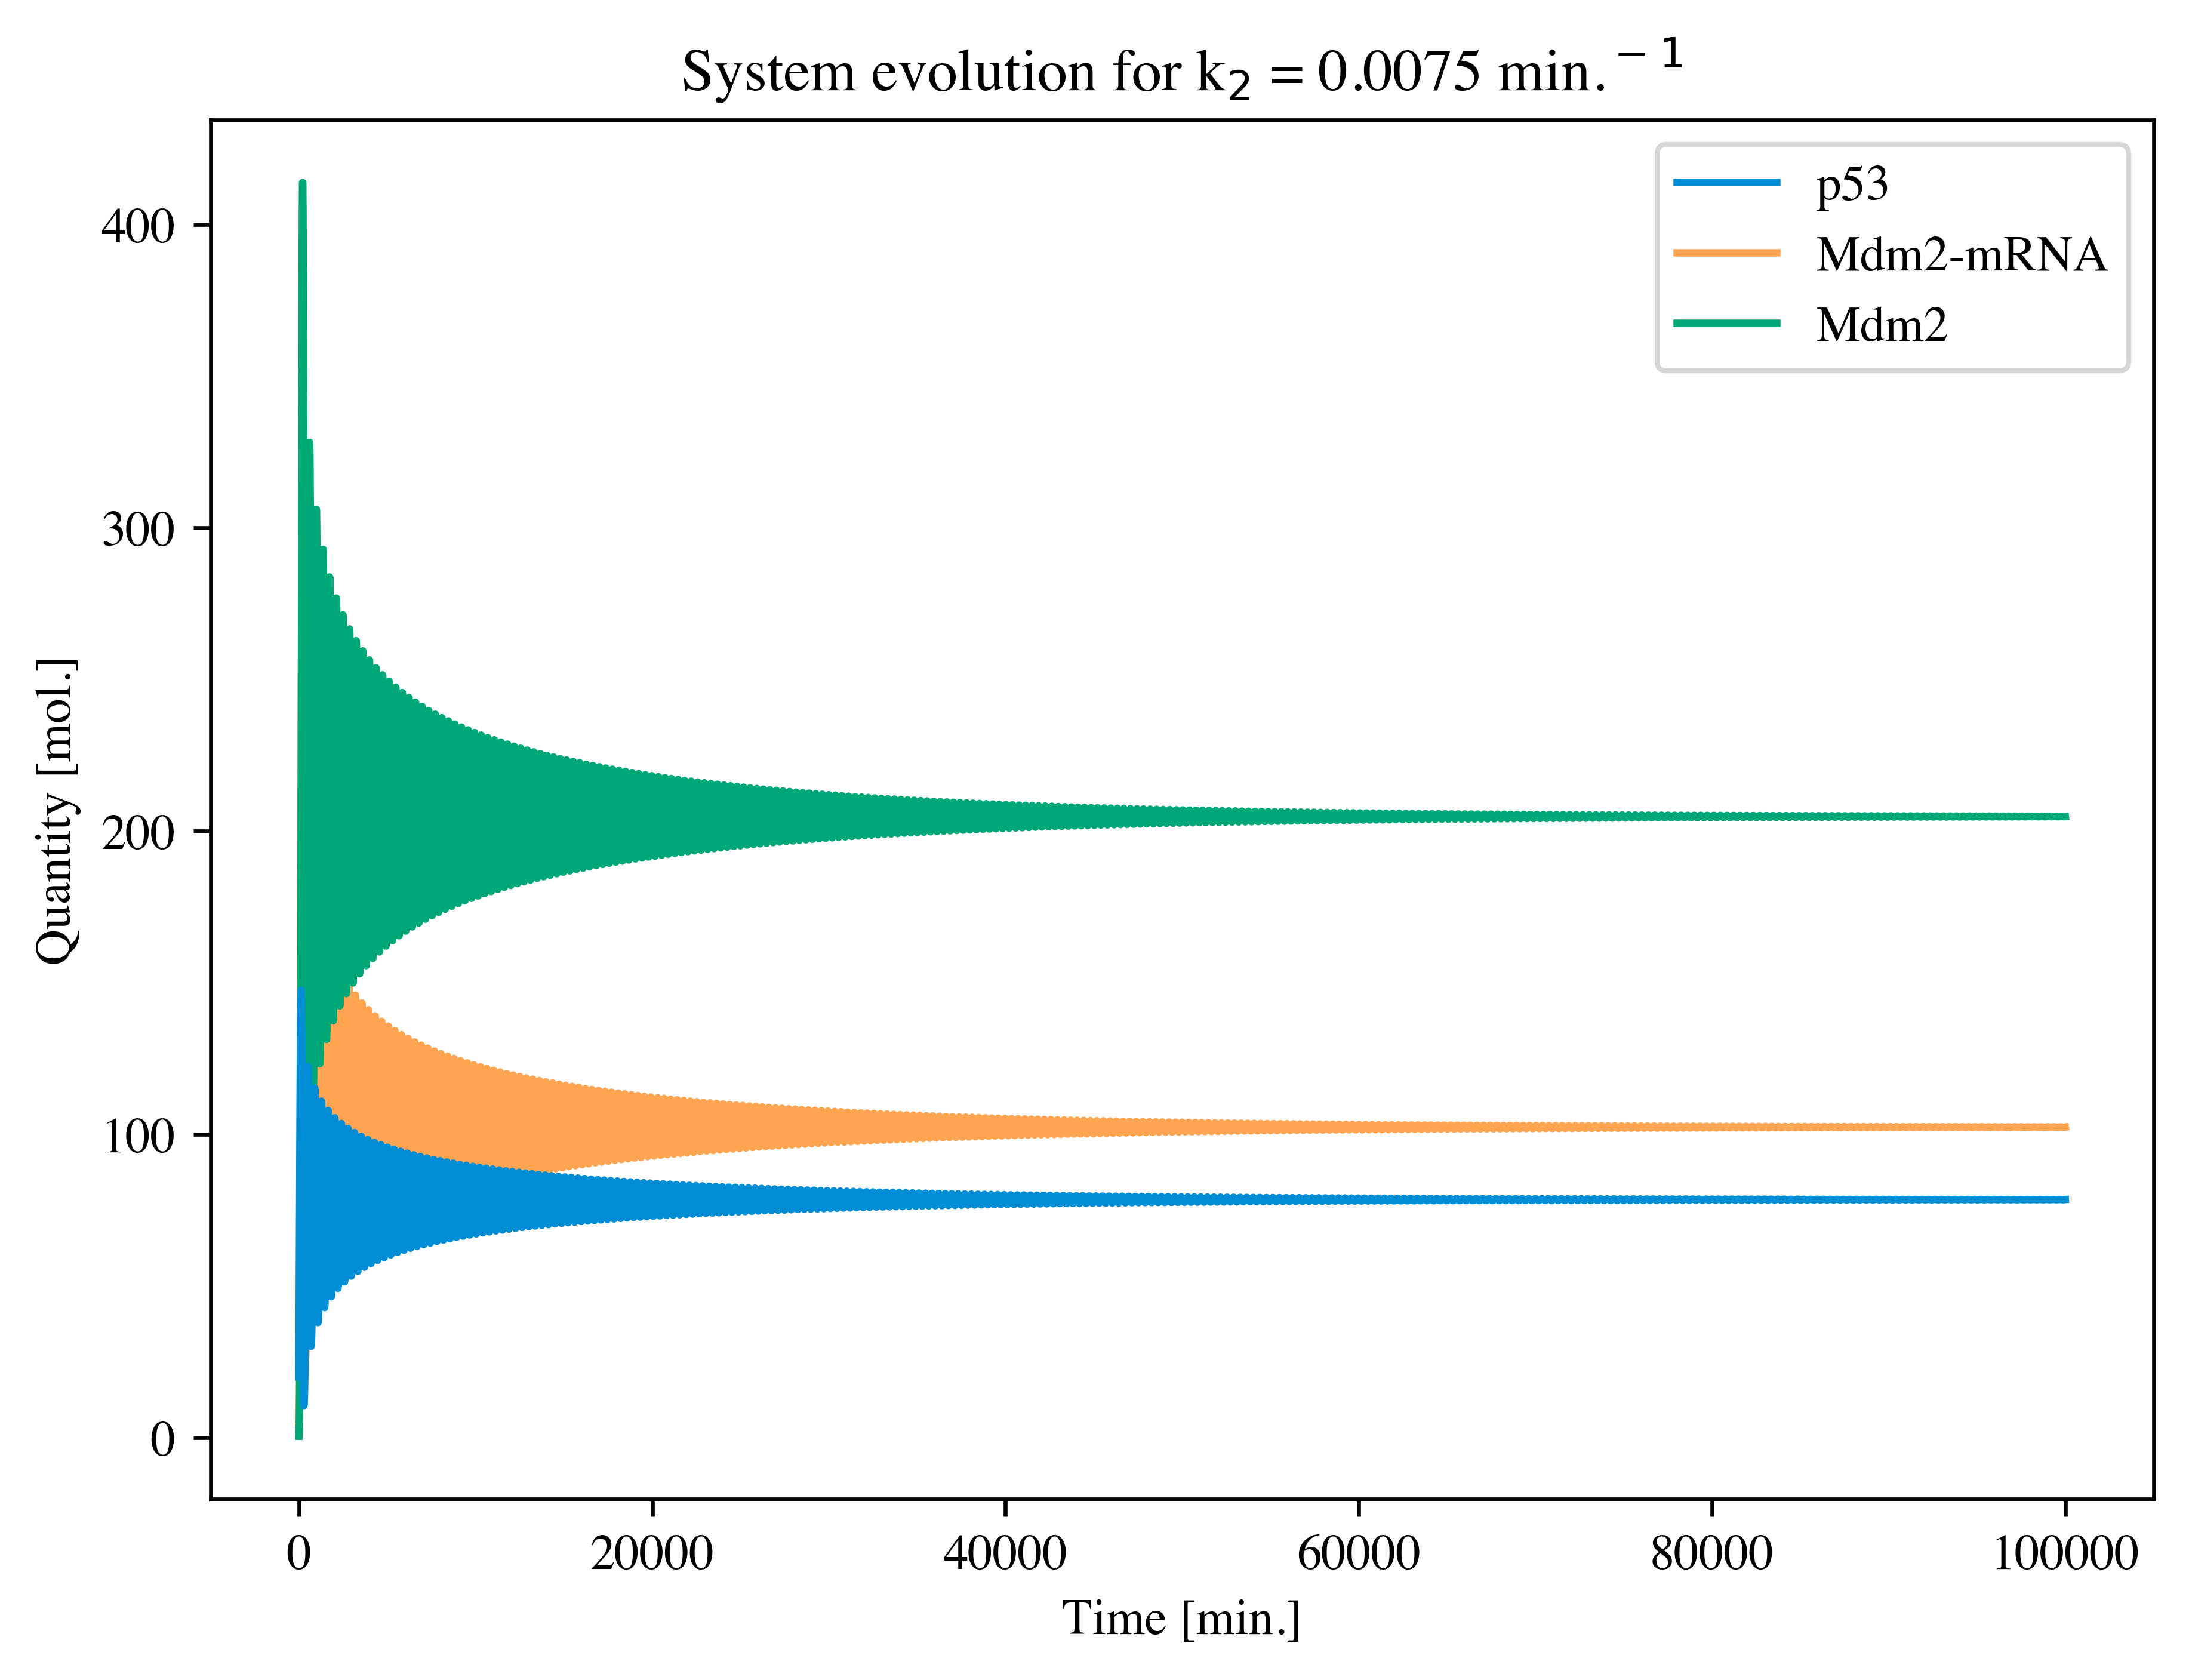

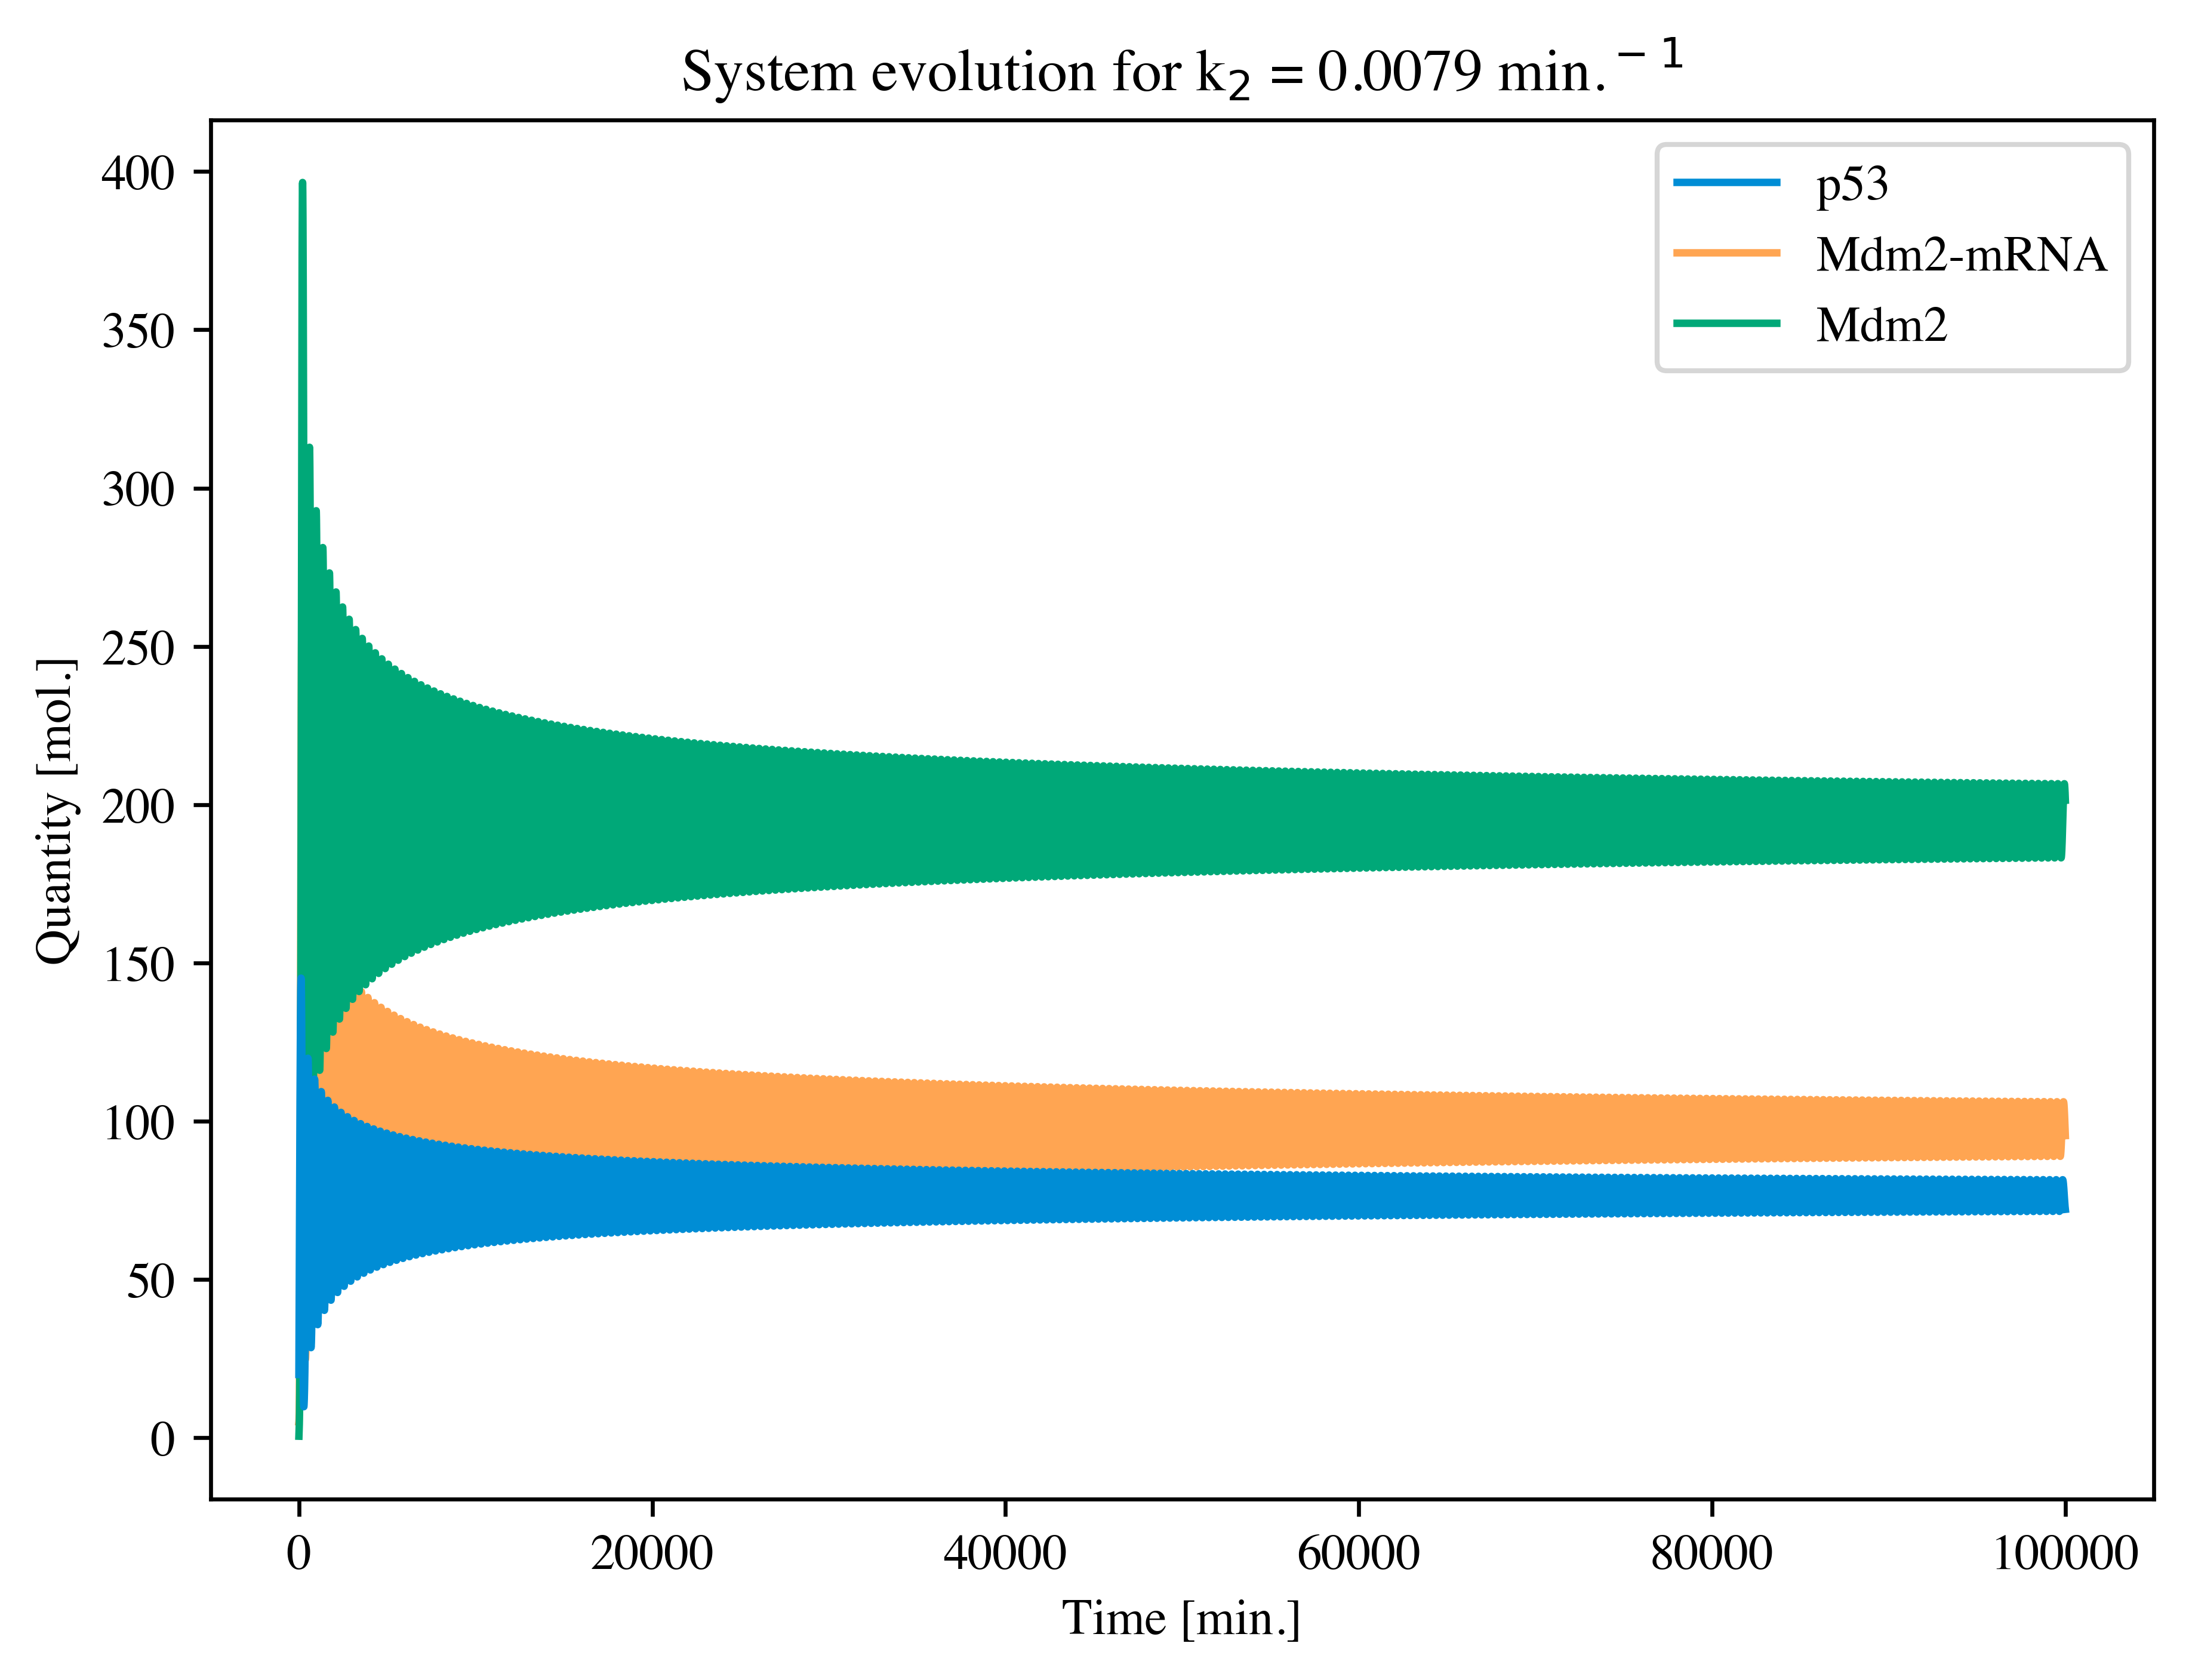

In [44]:
# plt.figure(dpi=600, figsize=[7,5])
# plt.plot(t1[0:50000], p1[0:50000], color=colors["p53"], zorder=5, label="p53")
# plt.plot(t1[0:50000], m1[0:50000], color=colors["mdm2_rna"], label="Mdm2-mRNA")
# plt.plot(t1[0:50000], M1[0:50000], color=colors["Mf"], label="Mdm2")
# plt.title(f"Trajectory k$_2$ = {kc2[0]}")
# plt.ylabel("Molecular concentration [AU]")
# plt.xlabel("time [min.]")
# plt.legend();

plt.figure(dpi=600, figsize=[7,5])
plt.plot(t2[0000:100000], p2[0000:100000], color=colors["p53"], zorder=5, label="p53")
plt.plot(t2[0000:100000], m2[0000:100000], color=colors["mdm2_rna"], label="Mdm2-mRNA")
plt.plot(t2[0000:100000], M2[0000:100000], color=colors["Mf"], label="Mdm2")
plt.title(f"System evolution for k$_2$ = {kc2[1]} min.$^-$$^1$")
plt.ylabel("Quantity [mol.]")
plt.xlabel("Time [min.]")
plt.legend();

plt.figure(dpi=600, figsize=[7,5])
plt.plot(t3[0000:100000], p3[0000:100000], color=colors["p53"], zorder=5, label="p53")
plt.plot(t3[0000:100000], m3[0000:100000], color=colors["mdm2_rna"], label="Mdm2-mRNA")
plt.plot(t3[0000:100000], M3[0000:100000], color=colors["Mf"], label="Mdm2")
plt.title(f"System evolution for k$_2$ = {kc2[2]} min.$^-$$^1$")
plt.ylabel("Quantity [mol.]")
plt.xlabel("Time [min.]")
plt.legend();

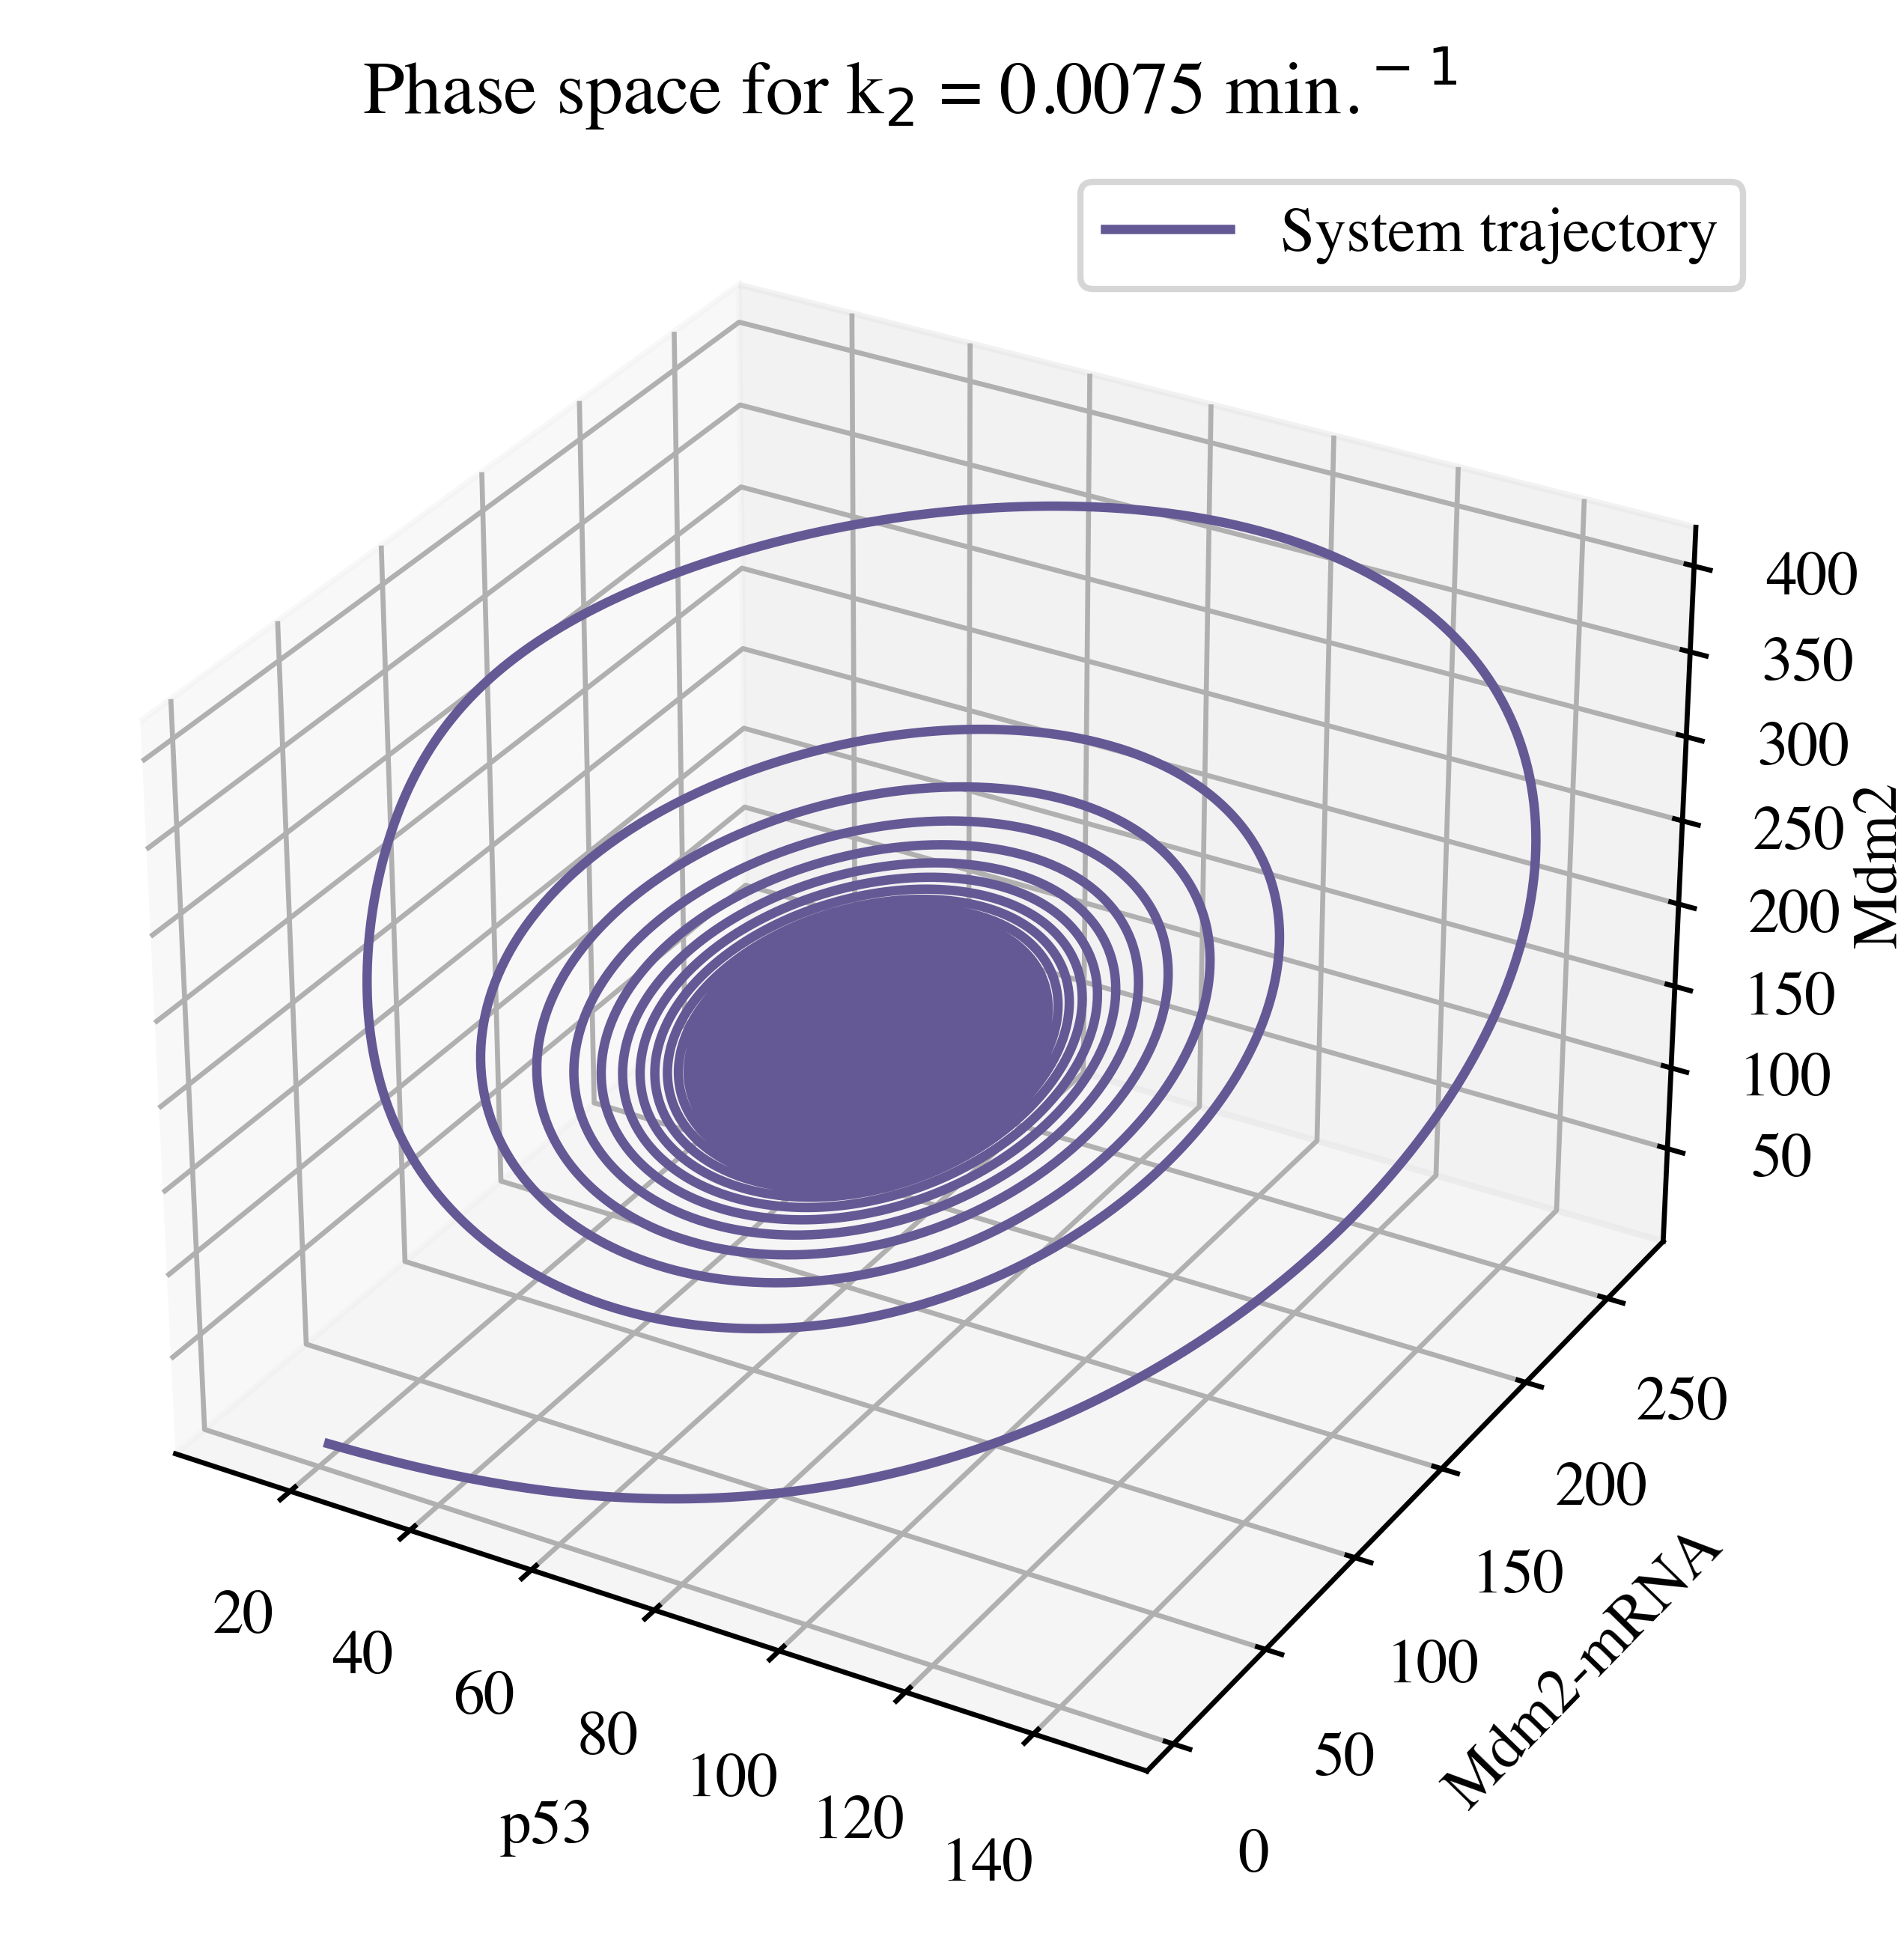

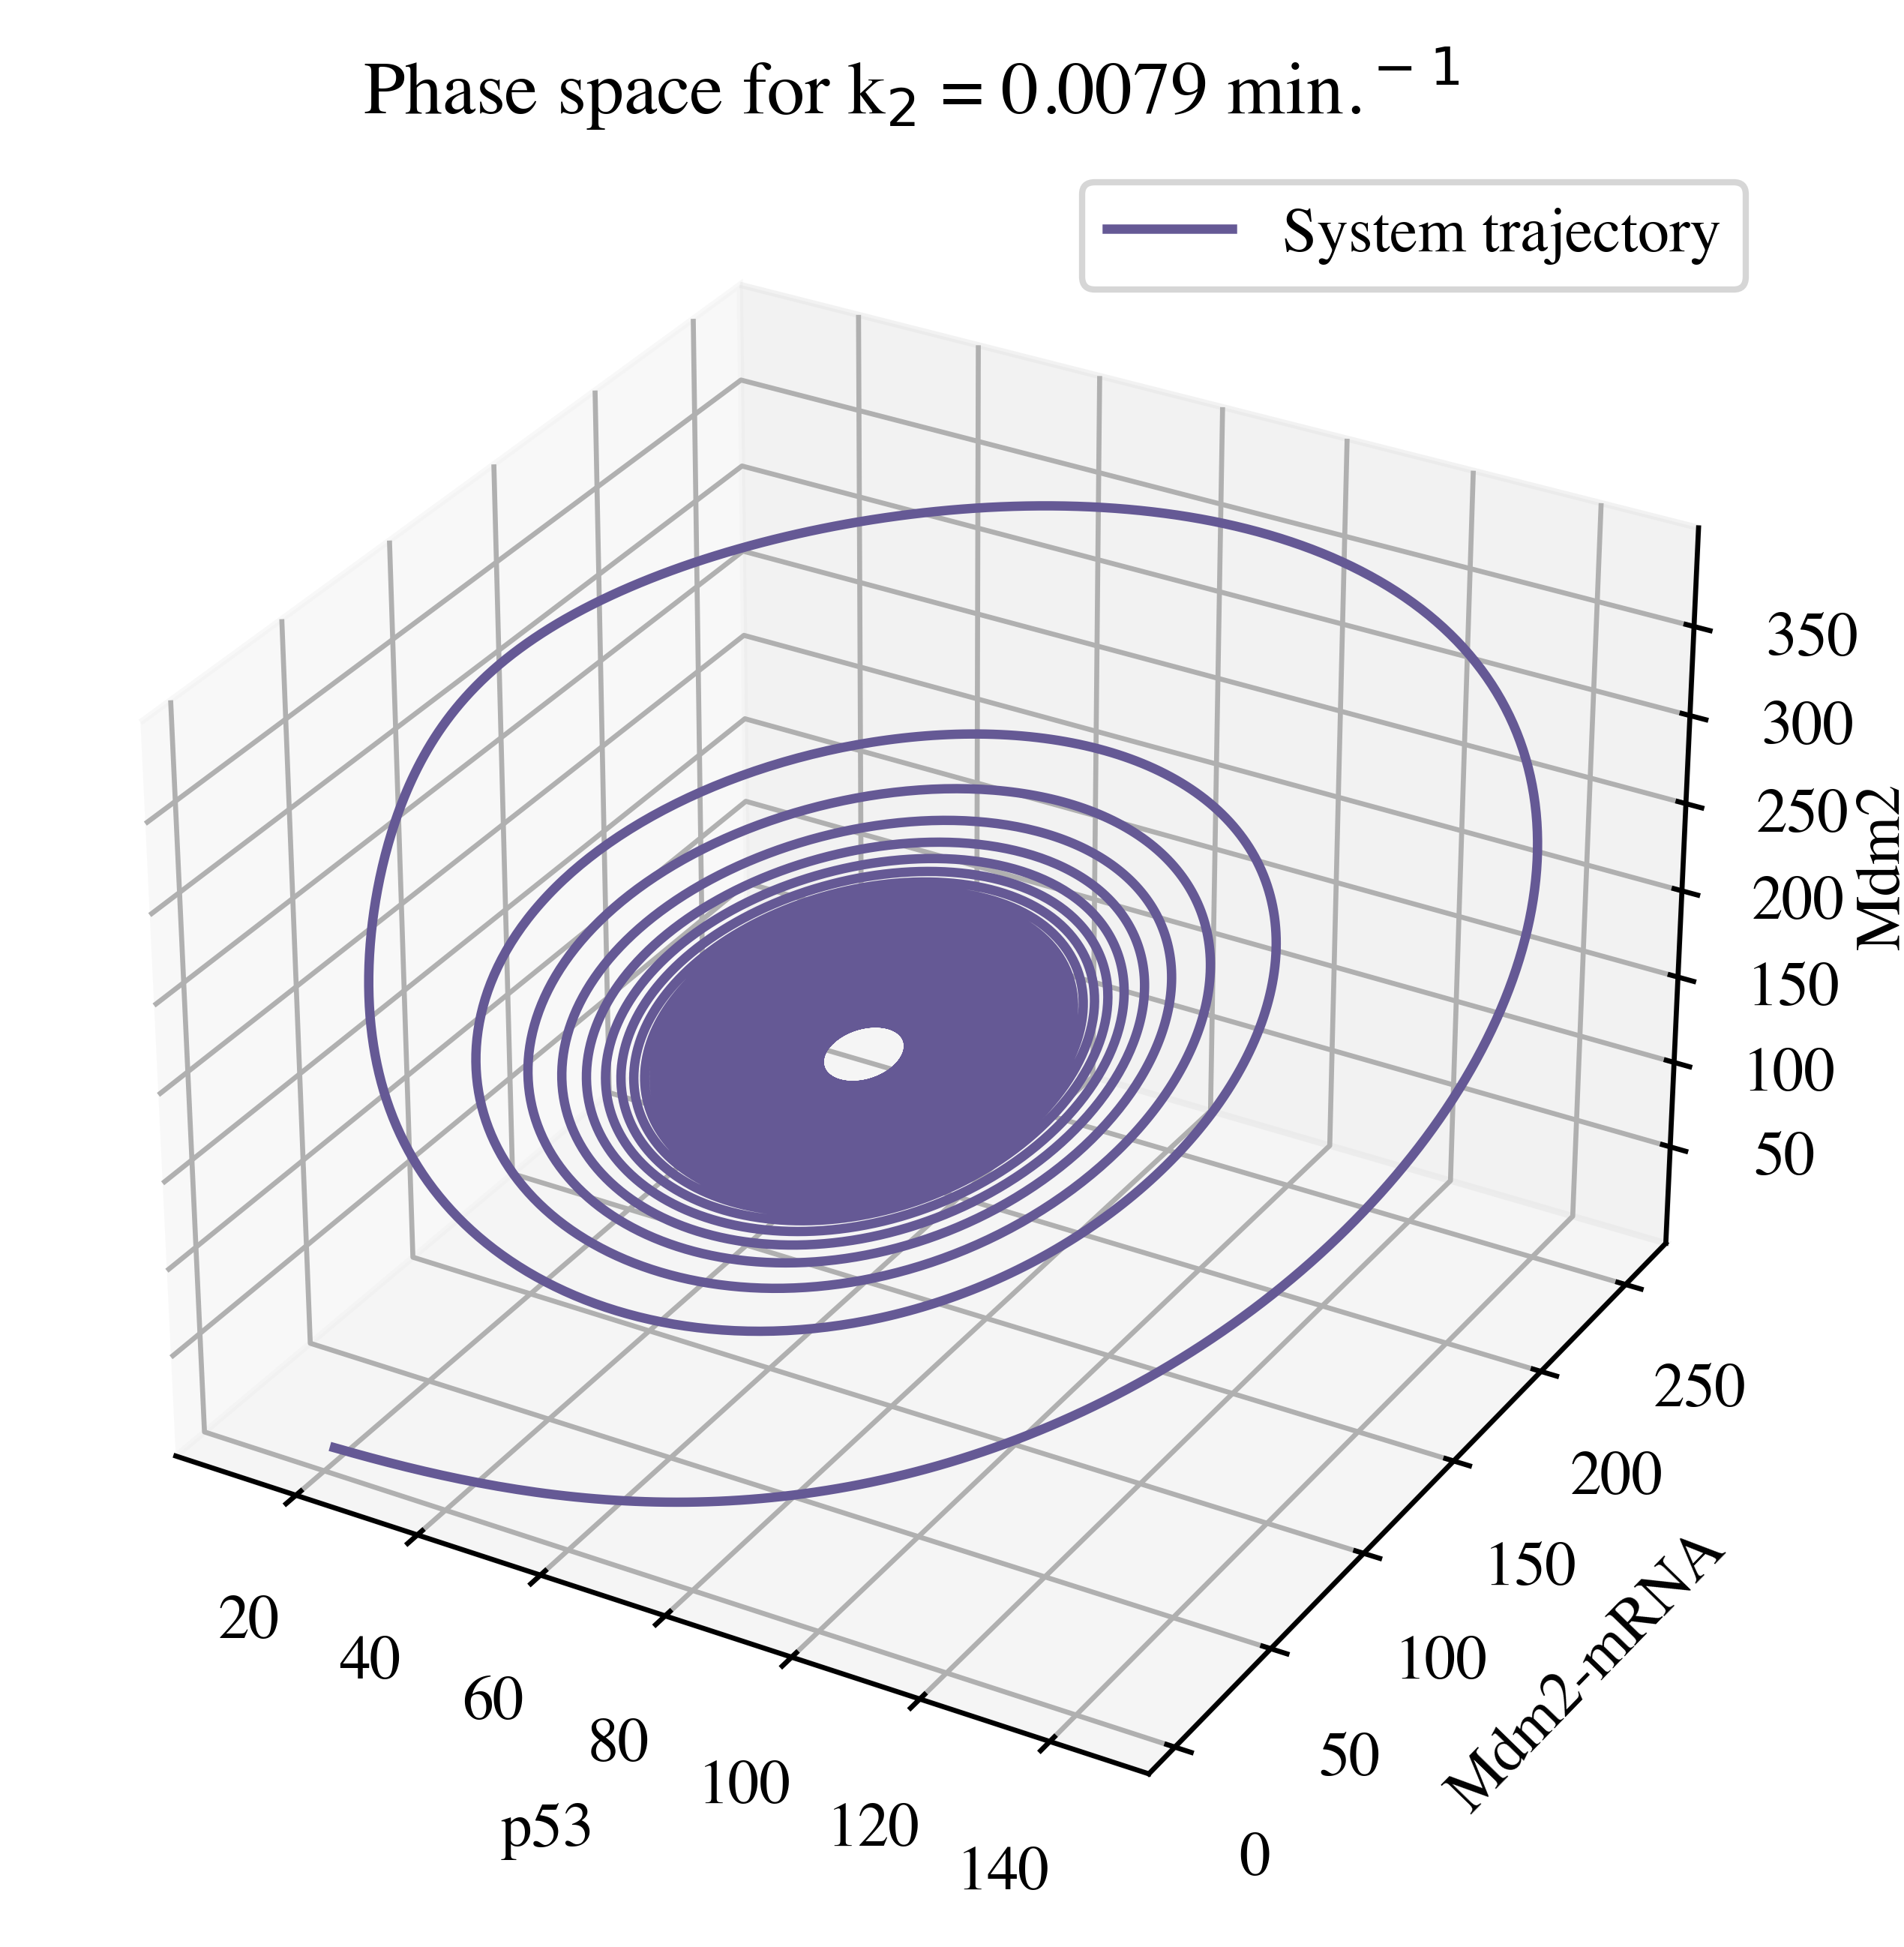

In [22]:
# man kan eventuelt plotter tættere på centrum for at undgår de grimme linjer i starten 

# fig1 = plt.figure(dpi=200, figsize = (15,5))
# ax1 = fig1.add_subplot(projection='3d')
# ax1.plot(p1, m1, M1, color=colors["p53"], label=f"System trajectory for k$_2$ = {kc2[0]}")
# ax1.set(xlabel='p53', ylabel='Mdm2-mRNA')
# ax1.set_zlabel("Mdm2", rotation=90)
# ax1.zaxis.labelpad=-1
# ax1.set_title('Phase Space')
# plt.legend();

fig2 = plt.figure(dpi=600, figsize = (15,5))
ax2 = fig2.add_subplot(projection='3d')
ax2.plot(p2, m2, M2, color=colors["phasespace"], label=f"System trajectory")
ax2.set(xlabel='p53', ylabel='Mdm2-mRNA')
ax2.set_zlabel("Mdm2", rotation=90)
ax2.zaxis.labelpad=-1
ax2.set_title(f'Phase space for k$_2$ = {kc2[1]} min.$^-$$^1$')
plt.legend();

fig3 = plt.figure(dpi=600, figsize = (15,5))
ax3 = fig3.add_subplot(projection='3d')
ax3.plot(p3, m3, M3, color=colors["phasespace"], label=f"System trajectory")
ax3.set(xlabel='p53', ylabel='Mdm2-mRNA')
ax3.set_zlabel("Mdm2", rotation=90)
ax3.zaxis.labelpad=-1
ax3.set_title(f'Phase space for k$_2$ = {kc2[2]} min.$^-$$^1$')
plt.legend();


In [23]:
# definerer symbolerne for parameterne
k1 = sp.Symbol('k1')
k2 = sp.Symbol('k2')
k3 = sp.Symbol('k3')
k4 = sp.Symbol('k4')
k5 = sp.Symbol('k5')
k6 = sp.Symbol('k6')
k7 = sp.Symbol('k7')

# definerer funktioner
dp = k1 - k2 * (M * p) / (k3 + p)
dm = k4 * p**2 - k5 * m
dM = k6 * m - k7 * M

# udregner indgange jacobiantmatricen
ddpdp = sp.diff(dp, p)
ddpdm = sp.diff(dp, m)
ddpdM = sp.diff(dp, M)
ddmdp = sp.diff(dm, p)
ddmdm = sp.diff(dm, m)
ddmdM = sp.diff(dm, M)
ddMdp = sp.diff(dM, p)
ddMdm = sp.diff(dM, m)
ddMdM = sp.diff(dM, M)

def jacobian(fp, c2):
    ddpdp1 = ddpdp.subs({p: fp[0], m: fp[1], M:fp[2], k1: kc1, k2: c2, k3: kc3, k4: kc4, k5: kc5, k6: kc6, k7: kc7})
    ddpdm1 = ddpdm.subs({p: fp[0], m: fp[1], M:fp[2], k1: kc1, k2: c2, k3: kc3, k4: kc4, k5: kc5, k6: kc6, k7: kc7})
    ddpdM1 = ddpdM.subs({p: fp[0], m: fp[1], M:fp[2], k1: kc1, k2: c2, k3: kc3, k4: kc4, k5: kc5, k6: kc6, k7: kc7})
    ddmdp1 = ddmdp.subs({p: fp[0], m: fp[1], M:fp[2], k1: kc1, k2: c2, k3: kc3, k4: kc4, k5: kc5, k6: kc6, k7: kc7})
    ddmdm1 = ddmdm.subs({p: fp[0], m: fp[1], M:fp[2], k1: kc1, k2: c2, k3: kc3, k4: kc4, k5: kc5, k6: kc6, k7: kc7})
    ddmdM1 = ddmdM.subs({p: fp[0], m: fp[1], M:fp[2], k1: kc1, k2: c2, k3: kc3, k4: kc4, k5: kc5, k6: kc6, k7: kc7})
    ddMdp1 = ddMdp.subs({p: fp[0], m: fp[1], M:fp[2], k1: kc1, k2: c2, k3: kc3, k4: kc4, k5: kc5, k6: kc6, k7: kc7})
    ddMdm1 = ddMdm.subs({p: fp[0], m: fp[1], M:fp[2], k1: kc1, k2: c2, k3: kc3, k4: kc4, k5: kc5, k6: kc6, k7: kc7})
    ddMdM1 = ddMdM.subs({p: fp[0], m: fp[1], M:fp[2], k1: kc1, k2: c2, k3: kc3, k4: kc4, k5: kc5, k6: kc6, k7: kc7})
    
    jac_ev = np.array([[ddpdp1, ddpdm1, ddpdM1], [ddmdp1, ddmdm1, ddmdM1], [ddMdp1, ddMdm1, ddMdM1]], dtype=float)

    return jac_ev

In [24]:
# definerer fikspunkter

fp1 = [p1[-1], m1[-1], M1[-1]]
fp2 = [p2[-1], m2[-1], M2[-1]]
fp3 = fp2

print(fp2)

[78.5402217468728, 102.40722608772033, 204.75928642953994]


In [25]:
# udregner egenværdierne

def eigenvals(fp, c2):
    ev_jac = jacobian(fp, c2)
    eigenvalues, eigenvectors = LA.eig(ev_jac)
    real = eigenvalues.real
    imag = eigenvalues.imag
    return real, imag, eigenvalues, eigenvectors

In [26]:
real1, imag1, eigenval1, eigenvec1 = eigenvals(fp1, kc2[0])
real2, imag2, eigenval2, eigenvec2 = eigenvals(fp2, kc2[1])
real3, imag3, eigenval3, eigenvec3 = eigenvals(fp3, kc2[2])
print(eigenval1)
print(eigenval2)
print(eigenval3)

[-0.00041834+0.01592188j -0.00041834-0.01592188j -0.03173136+0.j        ]
[-5.76170786e-05+0.01693268j -5.76170786e-05-0.01693268j
 -3.27776783e-02+0.j        ]
[ 9.06059708e-05+0.01728215j  9.06059708e-05-0.01728215j
 -3.31430798e-02+0.j        ]


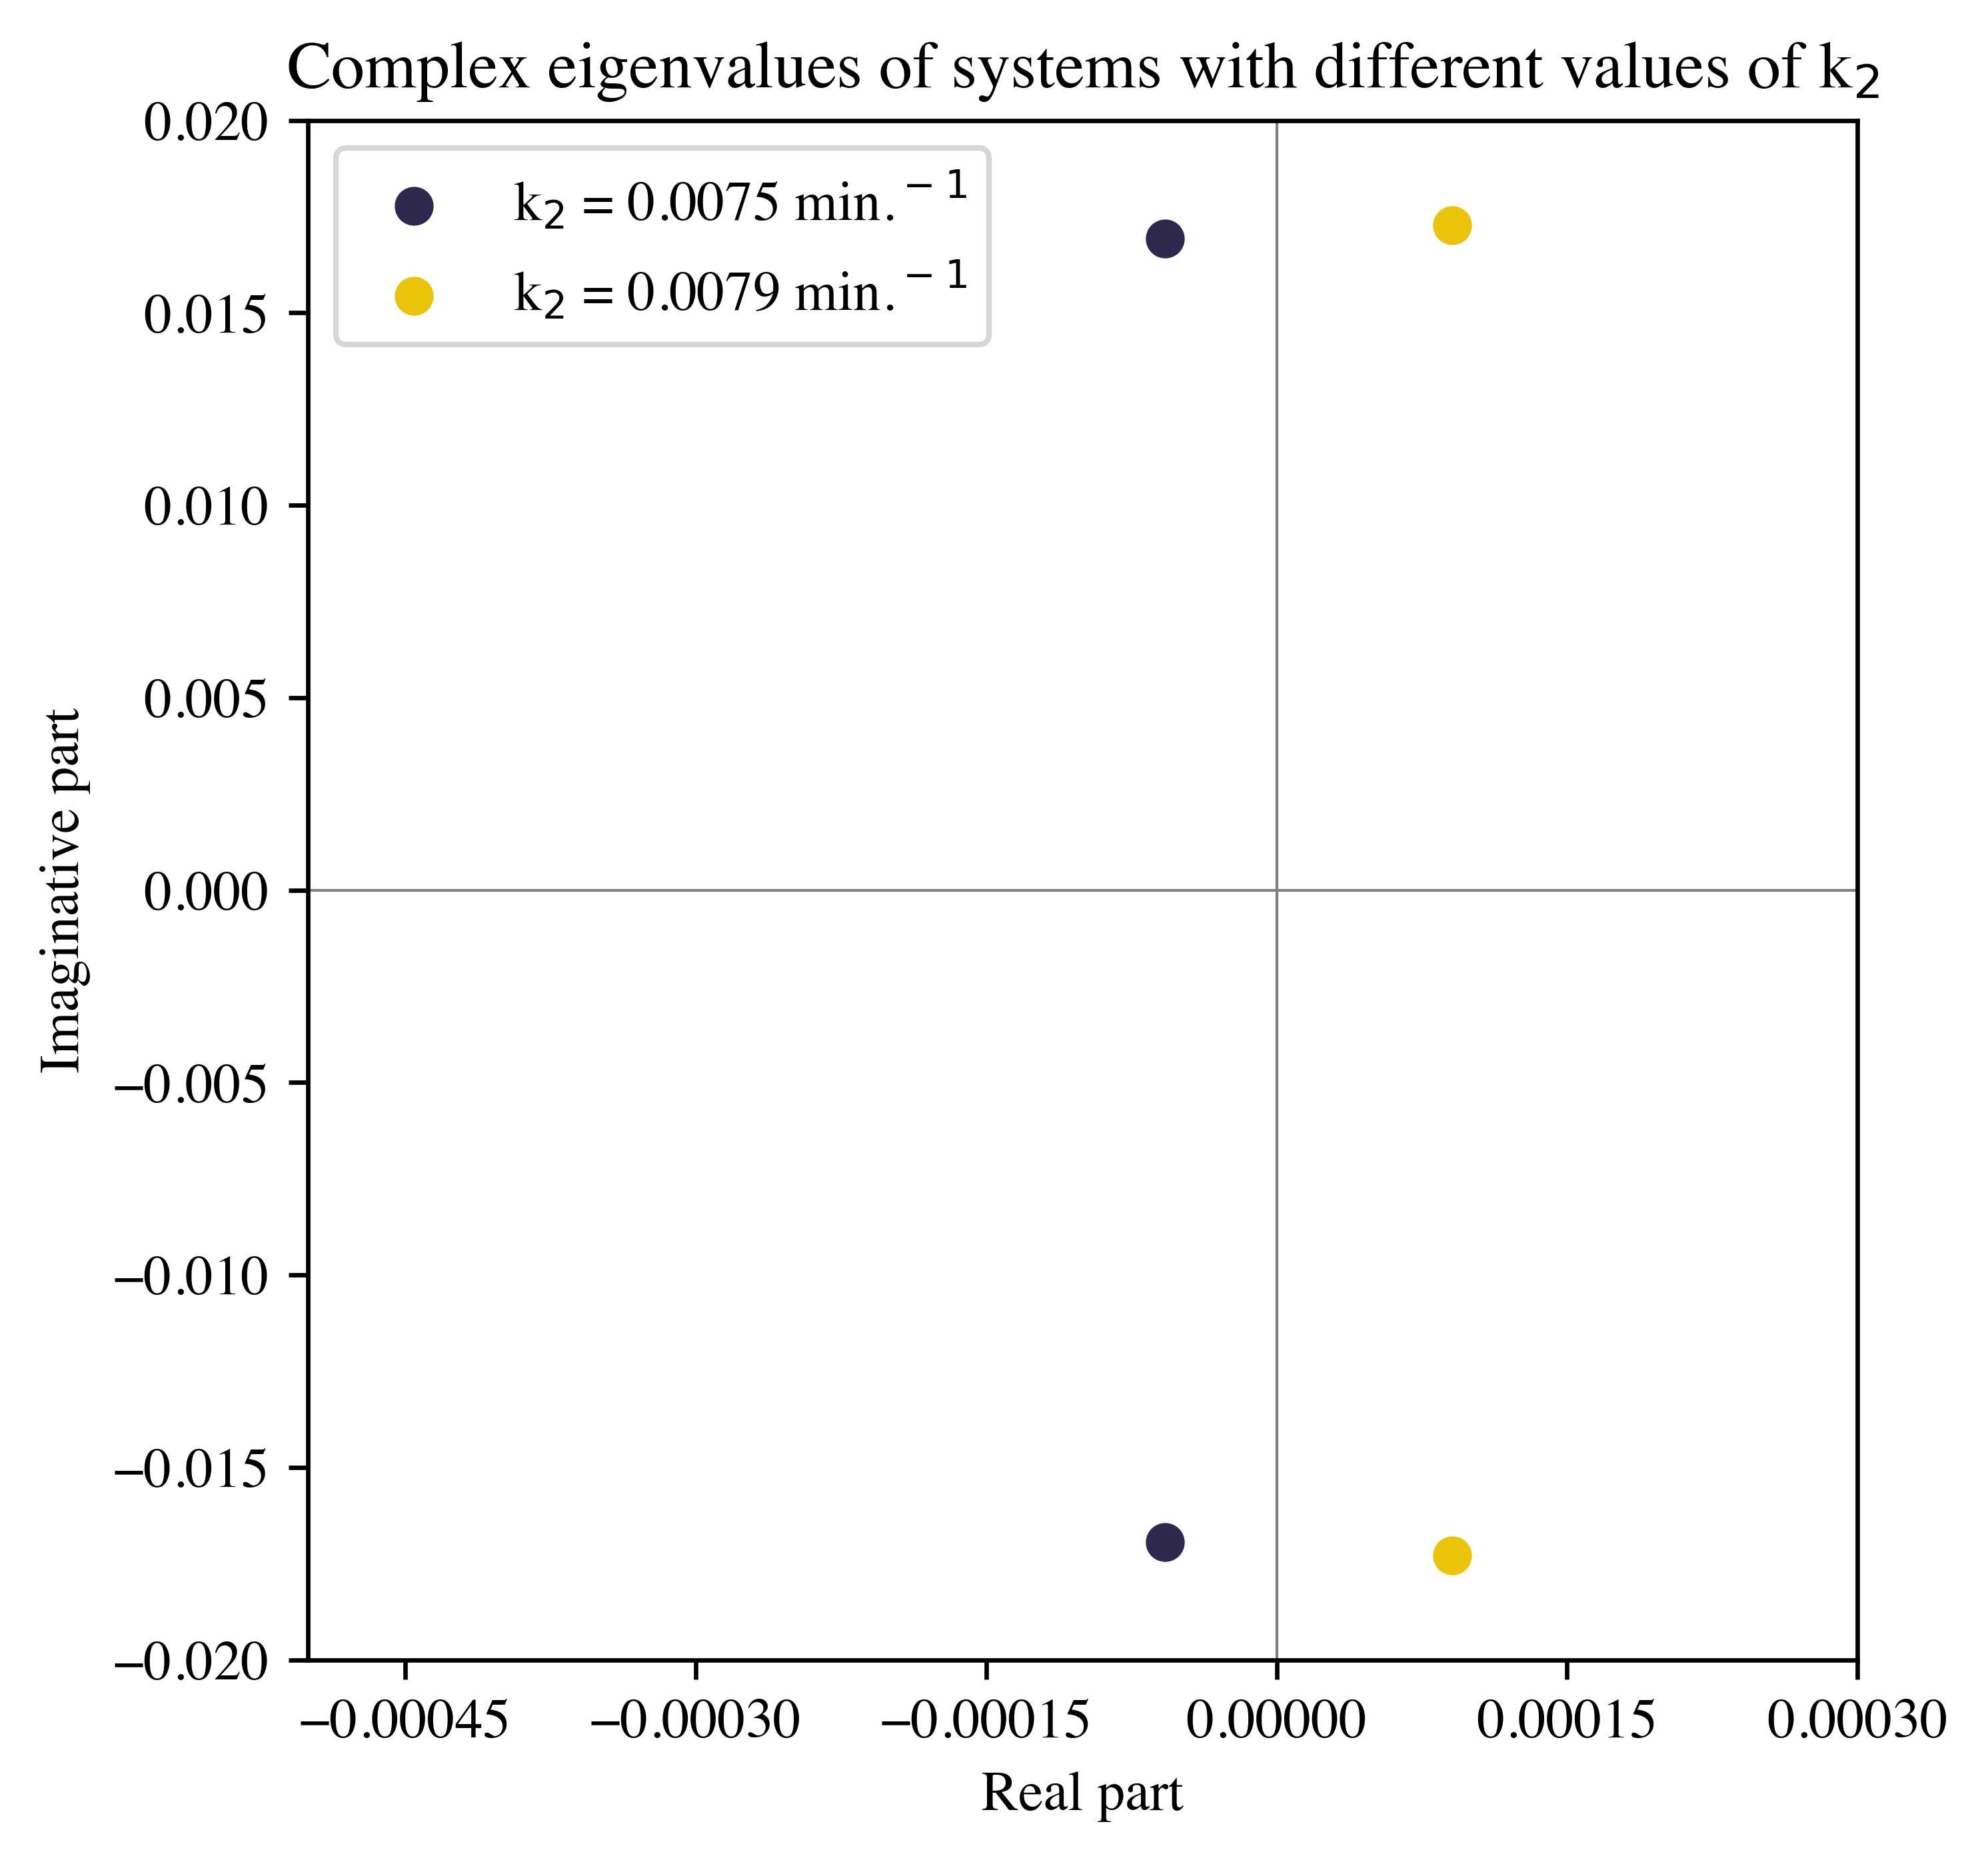

In [38]:
plt.figure(dpi=600, figsize=[5,5])
# plt.scatter(real1, imag1, color=colors['p53'],label=f'k$_2$ = {kc2[0]} min.$^-$$^1$')
plt.scatter(real2, imag2, color=colors['eigenvalue1'], label=f'k$_2$ = {kc2[1]} min.$^-$$^1$')
plt.scatter(real3, imag3, color=colors['eigenvalue2'], label=f'k$_2$ = {kc2[2]} min.$^-$$^1$')
plt.plot(np.zeros(1000), np.linspace(-0.02, 0.02, 1000), color='grey', linewidth=0.5, zorder=0)
plt.plot(np.linspace(-0.035, 0.005, 1000), np.zeros(1000), color='grey', linewidth=0.5, zorder=0)
plt.xlabel('Real part')
plt.ylabel('Imaginative part')
plt.ylim([-0.02, 0.02])
plt.xlim([-0.0005,0.0003])
plt.xticks(np.arange(-0.00045, 0.0003, 0.00015))
# plt.grid()
plt.title('Complex eigenvalues of systems with different values of k$_2$')
plt.legend();